## Initial setup
##### This analysis using ema is based on the work of Enayat A. Moallemi created on 22 May 2018 at the Fraunhofer ISI, Karlsruhe. In that instance, the analysis was done for the MATISSE model.

In [326]:

'''
Based on Enayat A. Moallemi version from May 2018

edited by Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on 18 December 2019

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob



## Load the results

In [327]:
from ema_workbench import load_results

#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-20-years.tar.gz')
#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-07_EET_allV3.tar.gz')
results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-24-LHS.tar.gz')


[MainProcess/INFO] results loaded succesfully from C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-24-LHS.tar.gz


In [328]:
experiments, outcomes = results

# Create a temporary copy of dictionary, with Outcomes Year
outcomesYear = dict(outcomes)

keysToRemove = [] 
# Iterate over the temporary dictionary and delete corresponding key from original dictionary
for (key, value) in outcomesYear.items() :
    if 'Month' in key:
        keysToRemove.append(key)
        
for k in keysToRemove:        
    del outcomesYear[k]   
    
        

In [329]:
experiments

,annualCpi,annualInflation,capacityFactorChangeBrownCoal,capacityFactorChangeWater,consumption,distributionUsageChange,energyEfficiency,generationRolloutPeriod,generatorRetirement,includePublicallyAnnouncedGen,...,priceChangePercentageWind,retailUsageChange,rooftopPV,semiScheduleGenSpotMarket,semiScheduleMinCapMarketGen,solarUptake,technologicalImprovement,scenario,policy,model
0,0.033927,0.012279,8.0,-9.0,Central,3.0,Central,0.0,-4.0,False,...,7.0,8.0,business,none,0.750607,Central,0.095510,None,0,Gr4sp
1,0.039789,0.010621,-5.0,-6.0,Central,5.0,Central,5.0,-5.0,True,...,13.0,-3.0,residential,primary,8.220329,Slow change,0.022943,None,1,Gr4sp
2,0.037928,0.032415,5.0,-3.0,Step change,-1.0,Slow change,8.0,-2.0,True,...,5.0,-1.0,business,secondary,14.437570,Fast change,0.059386,None,2,Gr4sp
3,0.018012,0.039781,-4.0,2.0,Slow change,2.0,Step change,5.0,-4.0,True,...,23.0,-5.0,residential,primary,28.095277,Central,0.025308,None,3,Gr4sp
4,0.024213,0.041644,-3.0,9.0,Slow change,3.0,Step change,3.0,0.0,True,...,23.0,-7.0,residential,secondary,0.601748,Step change,0.065931,None,4,Gr4sp
5,0.041356,0.042124,-4.0,3.0,Central,4.0,Central,8.0,-4.0,True,...,-25.0,8.0,both,none,21.889242,Step change,0.017348,None,5,Gr4sp
6,0.037758,0.041435,2.0,-6.0,Step change,4.0,Central,2.0,-3.0,True,...,-28.0,-4.0,business,primary,18.756510,Slow change,0.055260,None,6,Gr4sp
7,0.024356,0.028653,1.0,-9.0,High DER,-2.0,Slow change,9.0,-3.0,False,...,-2.0,8.0,residential,primary,1.340355,Central,0.071830,None,7,Gr4sp
8,0.017925,0.034299,9.0,2.0,Step change,-8.0,Step change,7.0,-1.0,True,...,-27.0,-7.0,residential,primary,18.051556,Slow change,0.037445,None,8,Gr4sp
9,0.042013,0.025004,-2.0,3.0,Step change,-3.0,Slow change,6.0,-1.0,False,...,6.0,-5.0,residential,primary,26.328058,Step change,0.074279,None,9,Gr4sp


In [330]:
#outcomes Options: wholesalePriceYear, GHGYear, tariffsYear, primarySpotProductionYear,
# secondarySpotProductionYear, offSpotProductionYear, rooftopPvProductionYear
# numActorsYear
outcomes_to_show = ['GHGYear','wholesalePriceYear', 'tariffsYear','primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'rooftopPVProductionYear' ]

# 22 levers selected after EET
levers = ['consumption', 'energyEfficiency', 'rooftopPV', 'solarUptake','annualCpi','annualInflation',
          'includePublicallyAnnouncedGen','generationRolloutPeriod','generatorRetirement','technologicalImprovement',
          'priceChangePercentageBrownCoal','priceChangePercentageWind','priceChangePercentageWater','capacityFactorChangeBrownCoal','capacityFactorChangeWater',
          'distributionUsageChange','retailUsageChange',
          'semiScheduleGenSpotMarket','semiScheduleMinCapMarketGen', 'nonScheduleGenSpotMarket', 'nonScheduleMinCapMarketGen', 
          'learningCurve' ]

#from startYear
startYear = 1998
startYearShift = (startYear - 1998)
#startYearShift = (startYear - 1997) * 12
time = outcomes['TIMEYear'][0, startYearShift:]
#index = pd.to_datetime(time, format = '%Y-%m-%d')
index = pd.to_datetime(time, format = '%Y')


# Target functions

In [ ]:
def target_always_after(outcomes,ooi,targetYear,targetVal,above):
    data = outcomes[ooi]
    num_exp = len(data)
    achieved = np.zeros(num_exp, dtype=bool)

    for i in range(num_exp):
        achieved[i] = False
        exp_run = data[i]
        for j in range( len(exp_run) ):
            if (startYear + j) >= targetYear:
                if above is True:
                    achieved[i] = exp_run[j] >= targetVal
                else:
                    achieved[i] = exp_run[j] < targetVal
                    
                #If the target is not achieved after the TargetYear, then mark experiment as False
                if achieved[i] == False:
                    break
    return achieved

def target_at_year(outcomes,ooi,targetYear,targetVal,above):
    data = outcomes[ooi]
    num_exp = len(data)
    achieved = np.zeros(num_exp, dtype=bool)

    for i in range(num_exp):
        achieved[i] = False
        exp_run = data[i]
        
        idx = targetYear - startYear
        if above is True:
            achieved[i] = exp_run[idx] >= targetVal
        else:
            achieved[i] = exp_run[idx] < targetVal                        
                
    return achieved

# Scenario discovery

## GHG emissions

In [331]:
#truncate experiments and outcomes for a selected policy and a selected outcome over mean in time series
#Subset of SOBOL levers
#selected_levers = list(['rooftopPV', 'annualCpi','capacityFactorChangeBrownCoal','capacityFactorChangeWater','semiScheduleMinCapMarketGen'])    
selected_levers = levers
ooi = 'GHGYear'
data = outcomes[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_levers] 

In [343]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
#y = (out_avg_ooi < 4.)
y = target_at_year( outcomes, ooi, 2020, 4.5, False)

prim_alg = prim.Prim(x, y, threshold=.5, threshold_type=prim.ABOVE)
box1 = prim_alg.find_box()



[MainProcess/INFO] 2200 points remaining, containing 617 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.095, coverage: 0.3387358184764992, density: 1.0 restricted_dimensions: 3


In [339]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.576985
density     0.735537
id                 3
mass            0.22
mean        0.735537
res_dim            2
Name: 3, dtype: object

                                       box 3                     \
                                         min                max   
semiScheduleGenSpotMarket             {none}             {none}   
nonScheduleGenSpotMarket   {secondary, none}  {secondary, none}   

                                                           
                                                qp values  
semiScheduleGenSpotMarket  [1.5631239929624493e-63, -1.0]  
nonScheduleGenSpotMarket    [7.352128947226741e-17, -1.0]  



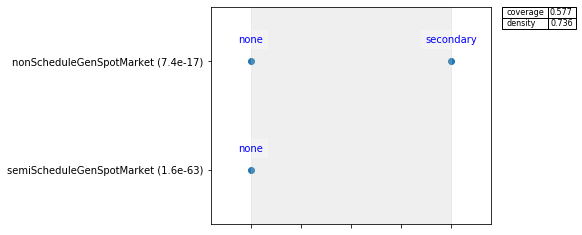

In [340]:
%matplotlib inline
box_1 = box1.inspect(3)
box_1 = box1.inspect(3, style='graph')


semiScheduleGenSpotMarket ['primary', 'secondary', 'none']
nonScheduleGenSpotMarket ['primary', 'secondary', 'none']


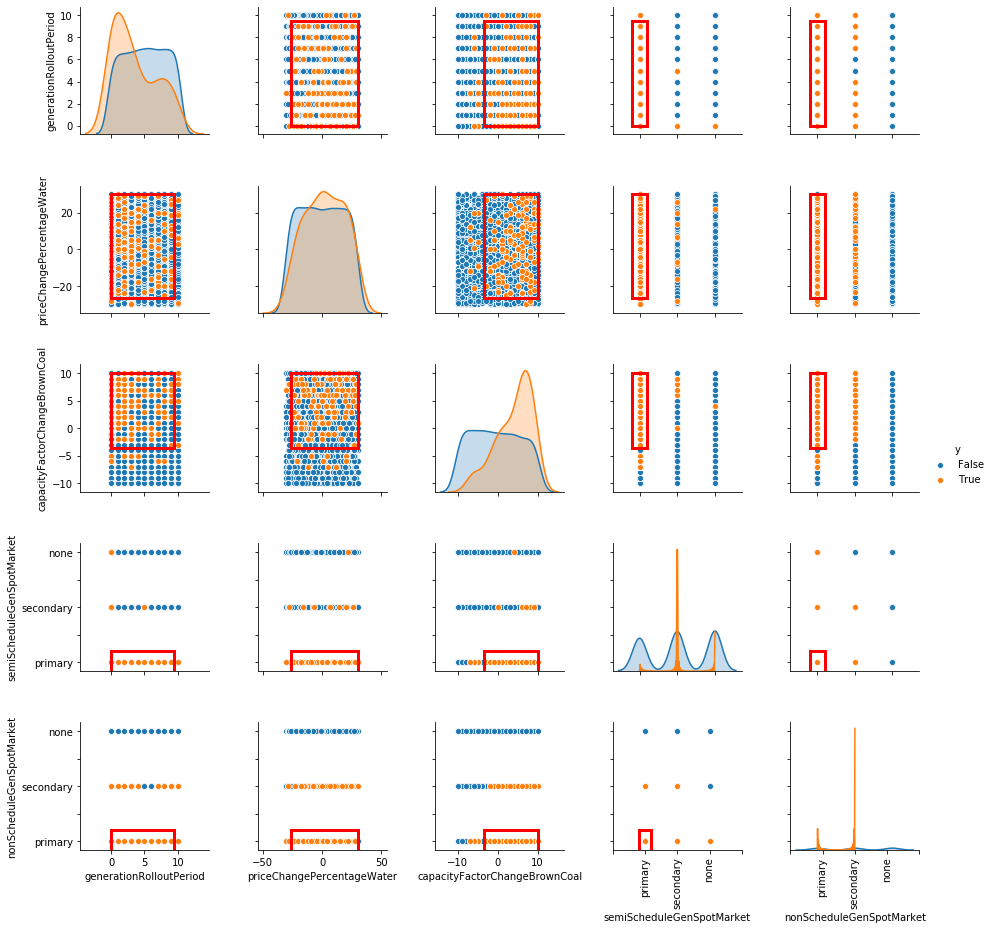

In [282]:
box1.select(11)
fig = box1.show_pairs_scatter(11)

plt.show()


### Feature Scoring

In [344]:
from EMAworkbench.ema_workbench.analysis import feature_scoring

fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1)



,1
0,
semiScheduleGenSpotMarket,0.207638
nonScheduleGenSpotMarket,0.140316
priceChangePercentageWater,0.078918
generationRolloutPeriod,0.075937
priceChangePercentageBrownCoal,0.066177
capacityFactorChangeBrownCoal,0.040556
capacityFactorChangeWater,0.033217
annualCpi,0.026484
learningCurve,0.026133


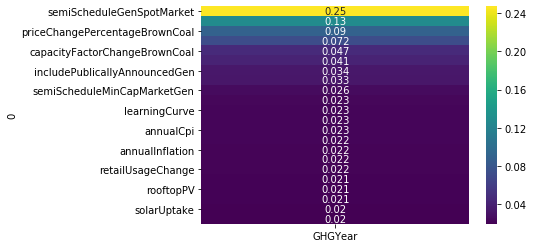

In [345]:
x = exp
y_all = {}
y_all['GHGYear'] = out_avg_ooi

fs = feature_scoring.get_feature_scores_all(x, y_all)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

### Dimensional Stacking


[MainProcess/INFO] model dropped from analysis because only a single category


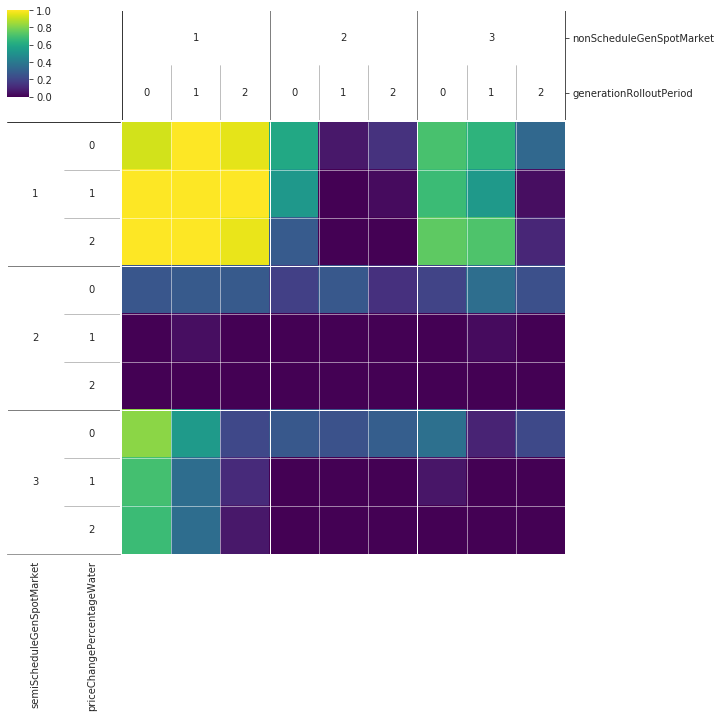

In [346]:

from EMAworkbench.ema_workbench.analysis import dimensional_stacking

x = experiments
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()



## Wholesale Price

In [188]:
# Subset Sool levers
selected_levers = list(['rooftopPV','annualCpi', 'generationRolloutPeriod', 'generatorRetirement',
                        'capacityFactorChangeBrownCoal','semiScheduleMinCapMarketGen'])    

#selected_levers = levers
ooi = 'wholesalePriceYear'
data = outcomes[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_levers] 

In [189]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
y = out_avg_ooi > 80

prim_alg = prim.Prim(x, y, threshold=.10, threshold_type=prim.ABOVE)
box1 = prim_alg.find_box()

[MainProcess/INFO] 48300 points remaining, containing 762 cases of interest
[MainProcess/INFO] mean: 0.17223065250379363, mass: 0.054575569358178054, coverage: 0.5958005249343832, density: 0.17223065250379363 restricted_dimensions: 3


In [190]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage     0.675853
density        0.1573
id                 12
mass        0.0677847
mean           0.1573
res_dim             2
Name: 12, dtype: object

                        box 12                                     
                           min  max                       qp values
generationRolloutPeriod    0.0  0.5  [-1.0, 2.877658028540578e-269]
generatorRetirement       -5.0  1.5   [-1.0, 1.938204225236567e-15]



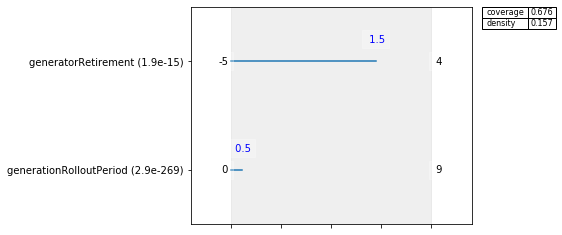

In [191]:
%matplotlib inline
box_1 = box1.inspect(12)
box_1 = box1.inspect(12, style='graph')


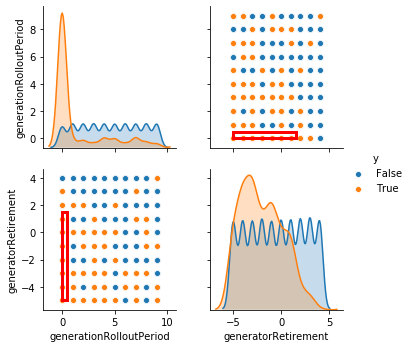

In [192]:
box1.select(12)
fig = box1.show_pairs_scatter(12)

plt.show()

## Tariffs

In [193]:
# Subset Sool levers
selected_levers = list(['consumption','rooftopPV','annualInflation','priceChangePercentageBrownCoal',
                        'priceChangePercentageWind','priceChangePercentageWater',
                        'capacityFactorChangeWater','retailUsageChange'])    

#selected_levers = levers
ooi = 'tariffsYear'
data = outcomes[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_levers] 

In [194]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
y = out_avg_ooi > 20

prim_alg = prim.Prim(x, y, threshold=.05, threshold_type=prim.ABOVE)
box1 = prim_alg.find_box()

[MainProcess/INFO] 48300 points remaining, containing 23691 cases of interest
[MainProcess/INFO] mean: 0.8883514711809755, mass: 0.05136645962732919, coverage: 0.09303110885990461, density: 0.8883514711809755 restricted_dimensions: 7


In [195]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.618547
density     0.642578
id                 8
mass        0.472153
mean        0.642578
res_dim            3
Name: 8, dtype: object

                                                          box 8  \
                                                            min   
priceChangePercentageWater                                -12.5   
consumption                 {Central, Step change, Fast change}   
retailUsageChange                                          -8.5   

                                                                 \
                                                            max   
priceChangePercentageWater                                   29   
consumption                 {Central, Step change, Fast change}   
retailUsageChange                                             9   

                                                            
                                                 qp values  
priceChangePercentageWater  [4.219832565402678e-182, -1.

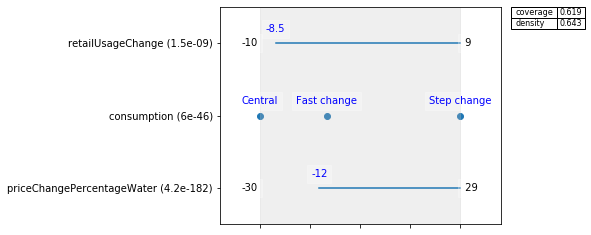

In [196]:
%matplotlib inline
box_1 = box1.inspect(8)
box_1 = box1.inspect(8, style='graph')

consumption ['Central', 'Step change', 'Fast change', 'Slow change']


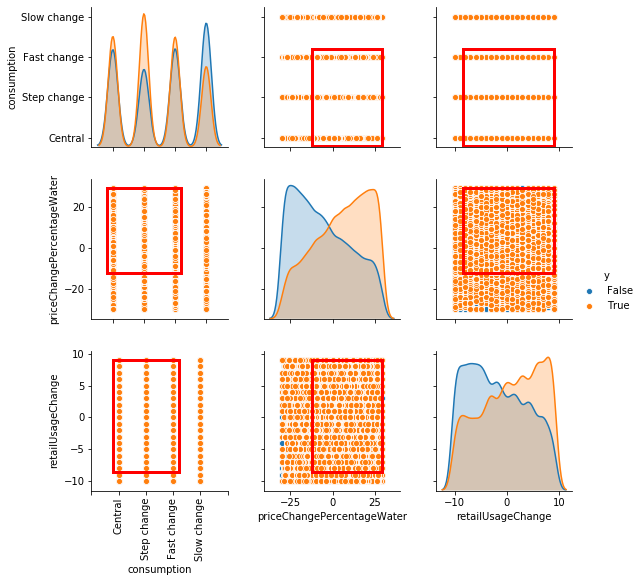

In [197]:
box1.select(8)
fig = box1.show_pairs_scatter(8)
plt.show()

## Primary Spot Production

In [201]:
# Subset Sool levers
selected_levers = list(['annualCpi','priceChangePercentageWind','priceChangePercentageWater',
                        'semiScheduleMinCapMarketGen'])    

selected_levers = levers

ooi = 'primarySpotProductionYear'
data = outcomes[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_levers] 

In [202]:
from EMAworkbench.ema_workbench.analysis import prim
from EMAworkbench.ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
 
x = exp
y = out_avg_ooi > 40000000

prim_alg = prim.Prim(x, y, threshold=0.3)
box1 = prim_alg.find_box()

[MainProcess/INFO] includePublicallyAnnouncedGen dropped from analysis because only a single category
[MainProcess/INFO] 48300 points remaining, containing 15241 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.16892339544513457, coverage: 0.5353323272751132, density: 1.0 restricted_dimensions: 5


In [203]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.720491
density     0.908497
id                 2
mass        0.250248
mean        0.908497
res_dim            2
Name: 2, dtype: object

                               box 2                        
                                 min        max    qp values
semiScheduleGenSpotMarket  {primary}  {primary}  [0.0, -1.0]
nonScheduleGenSpotMarket   {primary}  {primary}  [0.0, -1.0]



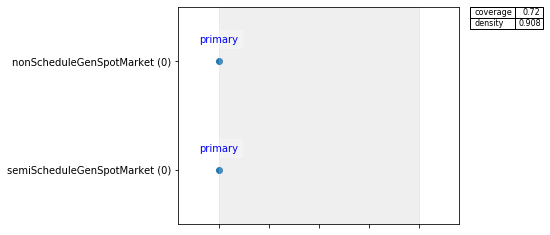

In [204]:
%matplotlib inline
box_1 = box1.inspect(2)
box_1 = box1.inspect(2, style='graph')

semiScheduleGenSpotMarket ['primary', 'secondary']
nonScheduleGenSpotMarket ['primary', 'secondary']


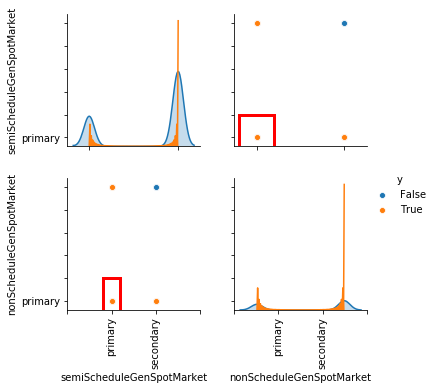

In [205]:
box1.select(2)
fig = box1.show_pairs_scatter(2)
plt.show()